# A first look at Optimization
dov-summer school 2019, peter.gruber@usi.ch

CVXOPT is a free software package for convex optimization based on the Python programming language.

See [CVXOPT documentation](https://cvxopt.org/userguide/intro.html) $\rightarrow$ discussion

In [1]:
pip install cvxopt

Note: you may need to restart the kernel to use updated packages.


In [2]:
from cvxopt import matrix, solvers
import numpy as np

### Matrices with CVXOPT
* Type can be integer, float or complex

In [3]:
# Create matrix, similar to R

# Matrix from list
# NB: All matrices are constructed by COLUMN!
A = matrix([3, 5, -2, 7], (2,2))

# Matrix from range
B = matrix(range(4), (2,2))

# Scalar matrix
C = matrix(1., (3,3))

# From np.array 
myArray = np.array([[1., 2., 3.], [4., 5., 6.]])
D = matrix(myArray) # can convert array into matrix

# Concatenate matrics
E = matrix([A, B])

print(A)
print(B)
print(C)
print(D)
print(E)

[ 3 -2]
[ 5  7]

[ 0  2]
[ 1  3]

[ 1.00e+00  1.00e+00  1.00e+00]
[ 1.00e+00  1.00e+00  1.00e+00]
[ 1.00e+00  1.00e+00  1.00e+00]

[ 1.00e+00  2.00e+00  3.00e+00]
[ 4.00e+00  5.00e+00  6.00e+00]

[ 3 -2]
[ 5  7]
[ 0  2]
[ 1  3]



**_A quick note on types:_** Some versions/solvers in CXVOPT only accept matrices of type **float**, i.e. no integers. Furthermore, the error messages may be misleading.

In [4]:
# Create a matrix with type float (tc="type code")
E = matrix([A, B], tc='d')
print(E)

[ 3.00e+00 -2.00e+00]
[ 5.00e+00  7.00e+00]
[ 0.00e+00  2.00e+00]
[ 1.00e+00  3.00e+00]



## Examples

## A first linear problem

Minimize 
$$2x_1 + x_2$$

Subject to 
$$\begin{align} -x_1+x_2 &\leq 1\\
x_1 + x_2 &\geq 2\\
x_2 &\geq 0\\
x_1 - 2x_2 &\leq 4\end{align}$$




To create a **drawing**, we have to reqrite the ineqalities as equalities (=borders) in the form of the line equation

$$\begin{align} 
(1)\quad x_2 &= 1+x_1\\
(2)\quad x_2 &= 2 -x_1\\
(3)\quad x_2 &= 0\\
(4)\quad x_2 &=2 - 0.5X_1\end{align}$$


In [1]:
from matplotlib import pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import seaborn as sns
xrange = (-4,5); yrange = (-4,6)

# Create lots of x1-points, calcuate x2 directly in plot
x1 = np.linspace(-5, 5)

fig, ax = plt.subplots(figsize=(8, 8))
plt.plot(x1, 1+x1, lw=3, label='Eq(1)')
plt.fill_between(x1, yrange[0], 1+x1, color="k", alpha=0.1) # w/o color = 'k' then it's colorful shade
plt.plot(x1, 2-x1, lw=3, label='Eq(2)')
plt.fill_between(x1, yrange[1], 2-x1, color="k", alpha=0.1)
plt.plot(x1, 0*x1, lw=3, label='Eq(3)')
plt.fill_between(x1, yrange[1], 0*x1, color="k", alpha=0.1)
plt.plot(x1, -2+0.5*x1, lw=3, label='Eq(4)')
plt.fill_between(x1, yrange[1], -2+0.5*x1,color="k",  alpha=0.1)
plt.plot(x1, max(1+x1,))

# highlight the feasible region
path = Path([(5., 6.), (.5, 1.5), (2., 0), (4., 0), (5., 0.5), (5., 6.)])
patch = PathPatch(path, label='feasible region', color="r",alpha=0.3)
ax.add_patch(patch)

# labels and stuff
plt.xlabel('x1'); plt.ylabel('x2')
plt.legend(fontsize=14)
plt.xlim(xrange); plt.ylim(yrange)
plt.show()


NameError: name 'np' is not defined

In [8]:
import numpy as np
x1 = np.linspace(-5, 5)
x_cmp = [x1, 1-x1]
# print(x_cmp)
print(type(x_cmp))
max(x_cmp)
# max_v = max(1+x1, 2-x1, 0*x1, -2+.5*x1)
# print(max_v)

<class 'list'>


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

### Discussion
* Have a look at the plot first. Where is the feasible region?
* Temporarily remove the `color="k"` options in the fills. Better?
* Uncomment the `ax.add_patch(patch)` command




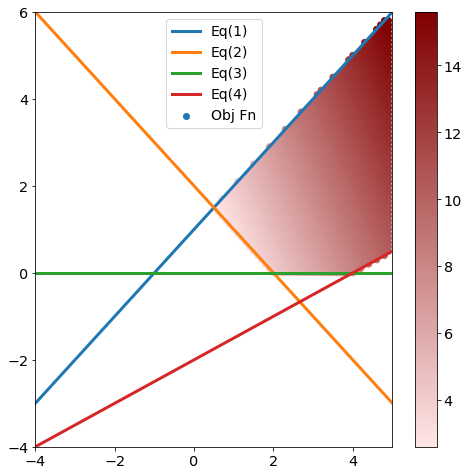

In [26]:
# Now let us add the values of the objective function

# Feasible (x1, x2) pairs
coordList = [[x1, x2] for x1 in np.arange(-4,5,0.1)
                for x2 in np.arange(-4,6,0.1)
                if (-x1 + x2) <= 1     #(1)
                and (x1 + x2) >= 2     #(2)
                and       x2  >= 0     #(3)         
                and (x1-2*x2) <= 4]    #(4)

# split array into columns
# Why x1p? Why is this not a problem above?
x1p = np.array(coordList)[:,0]
x2p = np.array(coordList)[:,1]

# caculate the objective function at each pair
z = 2*x1p + x2p  # the objective function

# Colormap
myCmap = sns.light_palette(("maroon"), as_cmap=True)

fig, ax = plt.subplots(figsize=(8, 8))
plt.xlim(xrange); plt.ylim(yrange)
plt.scatter(x1p, x2p, c=z, cmap=myCmap, label='Obj Fn')   # plot first so that we are in the background
plt.plot(x1, 1+x1, lw=3, label='Eq(1)')
plt.plot(x1, 2-x1, lw=3, label='Eq(2)')
plt.plot(x1, 0*x1, lw=3, label='Eq(3)')
plt.plot(x1, -2+0.5*x1, lw=3, label='Eq(4)')
plt.legend(fontsize=14)
plt.colorbar()
plt.show()

## Set up the CVXOP problem

See [Linear Programming](https://cvxopt.org/userguide/coneprog.html#linear-programming) in the CVXOPT documentation.

**Objective function:** rewrite in the form (with all vectors being *column* vectors)
$$c^T x$$

---

in our case
$$2x_1 + x_2 = \begin{pmatrix} 2 & 1 \end{pmatrix} \begin{pmatrix}x_1 \\ x_2\end{pmatrix}
$$
thus
$$ c = \begin{pmatrix} 2 \\ 1 \end{pmatrix} $$

---

**Inequality contrains** are a bit hard to read. They are
$$\begin{align} Gx + s &= h\\
s &\geq 0\end{align}$$

---

Simplify to
$$Gx \leq h$$

Rewrite our conditions in matrix form ... multiply by $-1$ to obain "smaller than" inequalities
$$\begin{align} -x_1+x_2 &\leq 1\\
-x_1 - x_2 &\leq -2\\
-x_2 &\leq 0\\
x_1 - 2x_2 &\leq 4\end{align}$$

Now we have

$$\underbrace{\begin{pmatrix}-1 & 1\\ -1 & -1 \\ 0 & -1 \\ 1 & -2\end{pmatrix}}_{G} \begin{pmatrix}x_1 \\ x_2\end{pmatrix} \leq
\underbrace{\begin{pmatrix}1 \\ -2 \\ 0 \\ 4\end{pmatrix}}_{h}$$




In [38]:
c = matrix([ 2.0, 1.0 ])
G = matrix([ [-1.0, -1.0, 0.0, 1.0], [1.0, -1.0, -1.0, -2.0] ])
h = matrix([ 1.0, -2.0, 0.0, 4.0 ])
sol=solvers.lp(c,G,h)
# ? solvers.lp

     pcost       dcost       gap    pres   dres   k/t
 0:  2.6471e+00 -7.0588e-01  2e+01  8e-01  2e+00  1e+00
 1:  3.0726e+00  2.8437e+00  1e+00  1e-01  2e-01  3e-01
 2:  2.4891e+00  2.4808e+00  1e-01  1e-02  2e-02  5e-02
 3:  2.4999e+00  2.4998e+00  1e-03  1e-04  2e-04  5e-04
 4:  2.5000e+00  2.5000e+00  1e-05  1e-06  2e-06  5e-06
 5:  2.5000e+00  2.5000e+00  1e-07  1e-08  2e-08  5e-08
Optimal solution found.


In [8]:
print(sol['x'])
print(sol['status'])
print(sol['primal objective'])    # the value of the obj fn
print(sol['iterations'])    # the value of the obj fn

[ 5.00e-01]
[ 1.50e+00]

optimal
2.499999989554308
5


## A quadratic program

Consider the following problem

$$\min_{x_1,x_2}  \frac{1}{2}x_1^2 + 3x_1 + 4x_2$$

subject to

$$\begin{align} x_1,x_2 &\geq 0\\
x_1 + 3x_2 &\geq 15\\
2x_1+5x_2 &\leq 100\\
3x_1 +4x_2 &\leq 80\end{align}$$

---

Again, we need to rewrite the problem in standard form

$$\min_{x} \frac{1}{2}x^TPx+q^Tx$$

subject to

$$\begin{align}Gx &\leq h\\
Ax &= b\end{align}$$

---

In our case this is 

$$\min_{x_1,x_2}  \frac{1}{2} \begin{pmatrix}x_1 & x_2\end{pmatrix} \underbrace{\begin{pmatrix}1 & 0 \\ 0 &0 \end{pmatrix}}_{P} \begin{pmatrix}x_1 \\ x_2\end{pmatrix} + \underbrace{\begin{pmatrix}3 & 4\end{pmatrix}}_{q} \begin{pmatrix}x_1 \\ x_2\end{pmatrix}$$

subject to

$$\underbrace{\begin{pmatrix}-1 & 0\\ 0 & -1 \\-1 & -3 \\2 & 5\\3 & 4\end{pmatrix}}_{G} \begin{pmatrix}x_1 \\ x_2\end{pmatrix} \leq \underbrace{\begin{pmatrix}0\\0\\-15\\100\\80\end{pmatrix}}_h$$





In [42]:
P = matrix([[1,0],[0,0]], tc='d')#,df="")
q = matrix([3.0,4.0])
G = matrix([[-1,0,-1,2,3],[0,-1,-3,5,4]], tc='d')
h = matrix([0,0,-15,100,80], tc = 'd')
print(P)

[ 1.00e+00  0.00e+00]
[ 0.00e+00  0.00e+00]



In [43]:
# This will not work immediately. Why?
sol = solvers.qp(P,q,G,h)

     pcost       dcost       gap    pres   dres
 0:  1.0780e+02 -7.6366e+02  9e+02  0e+00  4e+01
 1:  9.3245e+01  9.7637e+00  8e+01  6e-17  3e+00
 2:  6.7311e+01  3.2553e+01  3e+01  2e-16  1e+00
 3:  2.6071e+01  1.5068e+01  1e+01  2e-16  7e-01
 4:  3.7092e+01  2.3152e+01  1e+01  1e-16  4e-01
 5:  2.5352e+01  1.8652e+01  7e+00  6e-17  3e-16
 6:  2.0062e+01  1.9974e+01  9e-02  9e-17  2e-16
 7:  2.0001e+01  2.0000e+01  9e-04  2e-16  1e-16
 8:  2.0000e+01  2.0000e+01  9e-06  1e-16  3e-16
Optimal solution found.


In [44]:
print(sol['x'])
print(sol['status'])
print(sol['primal objective'])    # the value of the obj fn
print(sol['iterations'])          # the value of the obj fn

[ 7.13e-07]
[ 5.00e+00]

optimal
20.00000617311241
8


### *Now it is up to you ...*
Solve the quadratic program ...

minimize

$$2x_1^2 + x_2^2 + x_1x_2 + x_1 + x_2$$

subject to
$$\begin{align}
x_1&\geq 0 \\
x_2&\geq 0 \\
x_1 + x_2 &= 1
\end{align}$$


In [70]:
# Python code goes here
P = matrix([[2,1/2],[1/2,1]], tc='d')
P = P*2 # must be symmetric; otw, result will differ
q = matrix([1,1], tc='d')
G = matrix([[-1,0],[0,-1]], tc='d')
h = matrix([0,0], tc = 'd')
A = matrix([[1],[1]], tc='d')
b = matrix([1], tc='d')

print(P)
print(q)
print(G)
print(h)
print(A)
print(b)

[ 4.00e+00  1.00e+00]
[ 1.00e+00  2.00e+00]

[ 1.00e+00]
[ 1.00e+00]

[-1.00e+00  0.00e+00]
[ 0.00e+00 -1.00e+00]

[ 0.00e+00]
[ 0.00e+00]

[ 1.00e+00  1.00e+00]

[ 1.00e+00]



In [71]:
sol = solvers.qp(P,q,G,h,A,b)
print(sol['x'])
print(sol['status'])
print(sol['primal objective'])    # the value of the obj fn
print(sol['iterations'])          # the value of the obj fn


     pcost       dcost       gap    pres   dres
 0:  1.8889e+00  7.7778e-01  1e+00  2e-16  2e+00
 1:  1.8769e+00  1.8320e+00  4e-02  2e-16  6e-02
 2:  1.8750e+00  1.8739e+00  1e-03  2e-16  5e-04
 3:  1.8750e+00  1.8750e+00  1e-05  1e-16  5e-06
 4:  1.8750e+00  1.8750e+00  1e-07  1e-16  5e-08
Optimal solution found.
[ 2.50e-01]
[ 7.50e-01]

optimal
1.875000000000018
4
